<a href="https://colab.research.google.com/github/Sandanu87/W2054875_DSPL_Week-7/blob/main/Tutorial_07_project_life_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [59]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

In [ ]:
biab_patints = df[df['Outcome'] == 1]
median_bp = biab_patints['BloodPressure'].median()
print("median blood preassure of biabetes patients =",median_bp)

In [ ]:
count = df["Outcome"].value_counts()

ratio = count[1] / count[0]
print("ratio of diabetes patients to non-diabetes patients =",ratio)

Since the ratio between the diabetic patients to non-diabetic patients is 0.536, therefore the datatset in balanced.

In [ ]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

print(x.shape)
print(y.shape)

"stratify=y" is used to make sure that the training model and testing model has the same ratio of biabetic and non-diabetic patients distributed so that the model can run more accurately.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_clf = DecisionTreeClassifier(random_state=1)
model_clf.fit(x_train, y_train)
y_predict = model_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy score of 0.7239583333333334 means that the model correctly predicts that the 72.4% of the time a patient has diabetes.

In [ ]:
train_predict = model_clf.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predict)
print("Training Accuracy:", train_accuracy)

The training data accuracy is 100% while the test data accuracy is 72.4% which means that the model memorising the training data rather than learning meaningful patterns.

**Task 09**


Precision measures how many of the predicted positive cases were actually positive while the recall measures how many actual positive cases were correctly identified by the model.

In [ ]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:", con_matrix)


In [ ]:
flse_pstv = con_matrix[0, 1]
ttl_ngtv = con_matrix[0, 0] + con_matrix[0, 1]
flse_pstv_rate = flse_pstv / ttl_ngtv
print("False Positive Rate:", flse_pstv_rate)

#precision = con_matrix[1][1] / (con_matrix[1][1] + flse_pstv)

In [ ]:
true_pstv = con_matrix[1, 1]
ttl_pstv = con_matrix[1, 0] + con_matrix[1, 1]
sensitivity = true_pstv / ttl_pstv
print("Recall:", sensitivity)

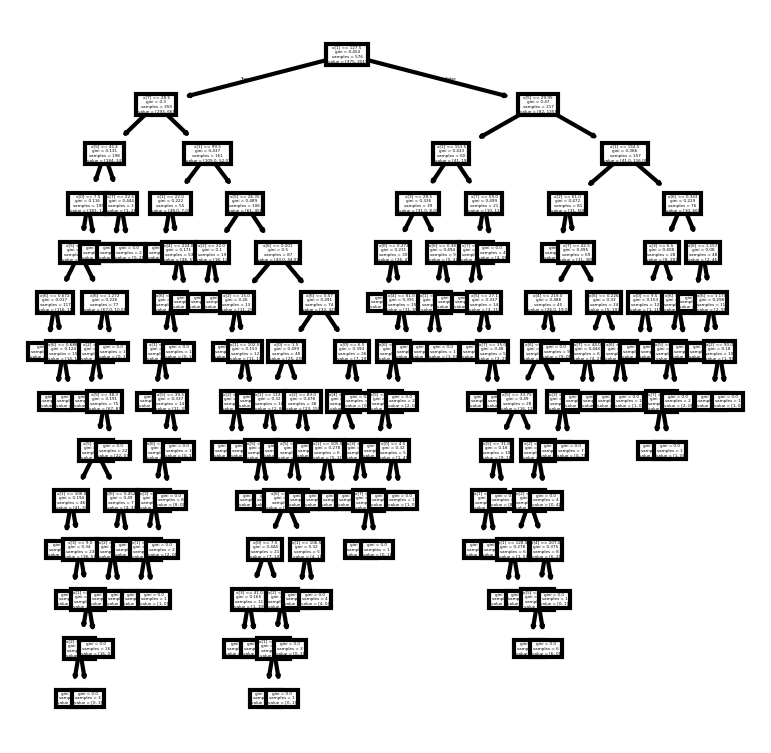

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model_clf)
plt.show()

In [42]:
#Task 13

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

classification_rep = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", classification_rep)



Confusion Matrix:
 [[106  19]
 [ 44  23]]
Accuracy: 0.671875
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77       125
           1       0.55      0.34      0.42        67

    accuracy                           0.67       192
   macro avg       0.63      0.60      0.60       192
weighted avg       0.65      0.67      0.65       192



The decisiontreeclassifier gave an accuracy score of 0.74  while the kneighborsclassifier gave an accuracy score of 0.67. Therefore the desiciontreeclassifier is the most accurate.

# **Task 14**

In [35]:
weather = pd.read_csv('pm25_2016_2020.csv')

In [36]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         100000 non-null  int64  
 1   date_local         100000 non-null  object 
 2   latitude_x         100000 non-null  float64
 3   longitude_x        100000 non-null  float64
 4   elevation          100000 non-null  float64
 5   tavg               88211 non-null   float64
 6   tmin               88439 non-null   float64
 7   tmax               88438 non-null   float64
 8   prcp               70992 non-null   float64
 9   snow               52142 non-null   float64
 10  wdir               42903 non-null   float64
 11  wspd               86902 non-null   float64
 12  wpgt               429 non-null     float64
 13  pres               73767 non-null   float64
 14  tsun               1518 non-null    float64
 15  arithmetic_mean_a  100000 non-null  float64
 16  ari

In [44]:
print("Columns for geographic distribution analysis:")
print("- Latitude")
print("- Longitude")

Columns for geographic distribution analysis:
- Latitude
- Longitude


In [49]:
x = weather[['latitude_x', 'longitude_x']]
print(x.head())

   latitude_x  longitude_x
0   39.024265   -95.711275
1   39.024265   -95.711275
2   39.024265   -95.711275
3   39.024265   -95.711275
4   39.024265   -95.711275


In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
x["cluster"] = kmeans.fit_predict(x[['latitude_x', 'longitude_x']])
x["cluster"] = x["cluster"].astype("category")

<ipython-input-55-a3ae82910bc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"] = kmeans.fit_predict(x[['latitude_x', 'longitude_x']])
<ipython-input-55-a3ae82910bc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"] = x["cluster"].astype("category")


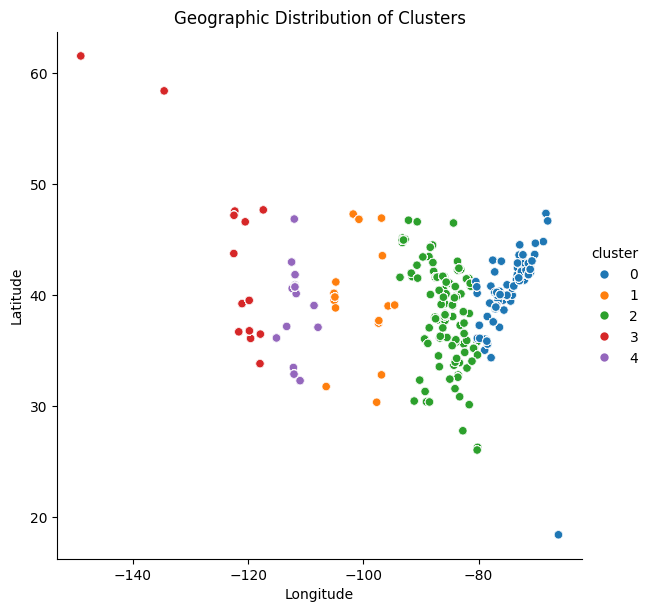

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.relplot(x=x["longitude_x"], y=x["latitude_x"], hue=x["cluster"], data=None, height=6)
plt.title("Geographic Distribution of Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
